In [3]:
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784')

In [6]:
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


In [7]:
X, y=mnist['data'],mnist['target']

In [8]:
X.shape

(70000, 784)

In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
y.shape

(70000,)

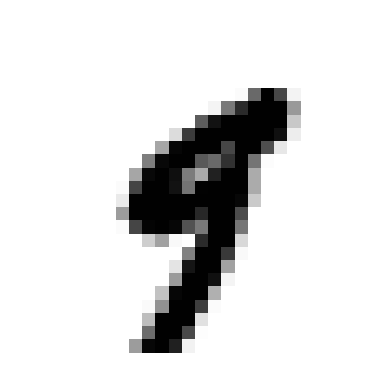

In [11]:
some_digit=X.iloc[36000].to_numpy()
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='auto')
plt.axis('off')
plt.show()

In [12]:
y[36000]

'9'

In [13]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [14]:
help(sklearn.utils._bunch.Bunch)

Help on class Bunch in module sklearn.utils._bunch:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |
 |  Container object exposing keys as attributes.
 |
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __dir__(self)
 |      Default dir() implementation.
 |
 |  __getattr__(self, key)
 |
 |  __getitem__(self, key)
 |      Return self[key].
 |
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __setattr__(self, key, value)
 |      Impleme

In [15]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [16]:
X_train,X_test,y_train,y_test=X_train.to_numpy(),X_test.to_numpy(),y_train.to_numpy(),y_test.to_numpy()

In [17]:
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [18]:
y_train_5=(y_train=='5')

In [19]:
y_test_5=(y_test=='5')

In [20]:
from sklearn.linear_model import SGDClassifier

In [21]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [22]:
np.sum(y_train_5==True)

np.int64(5421)

In [23]:
some_digit=X_train[6]
sgd_clf.predict([some_digit])

array([False])

In [24]:
from sklearn.model_selection import cross_val_score


In [25]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95965, 0.9634 , 0.9329 ])

In [26]:
from sklearn.base import BaseEstimator

In [27]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [28]:
never_5_clf=Never5Classifier()

In [29]:
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9117 , 0.9085 , 0.90875])

In [30]:
from sklearn.model_selection import cross_val_predict

In [31]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_train_5,y_train_pred)

array([[52582,  1997],
       [  884,  4537]])

In [34]:
from sklearn.metrics import precision_score,recall_score

In [35]:
precision_score(y_train_5,y_train_pred)

0.6943679216406489

In [36]:
recall_score(y_train_5,y_train_pred)

0.8369304556354916

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_score(y_train_5,y_train_pred)

0.759012965286491

In [39]:
y_scores=sgd_clf.decision_function([some_digit])

In [40]:
y_scores

array([-4154.0471219])

In [41]:
threshold=4000

In [42]:
y_some_digit_pred=(y_scores>threshold)

In [43]:
y_some_digit_pred

array([False])

In [44]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [45]:
from sklearn.metrics import precision_recall_curve

In [46]:
precisions, recalls, thresholds=precision_recall_curve(y_train_5,y_scores)

In [47]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],label='Precision')
    plt.plot(thresholds,recalls[:-1],"g-",label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    

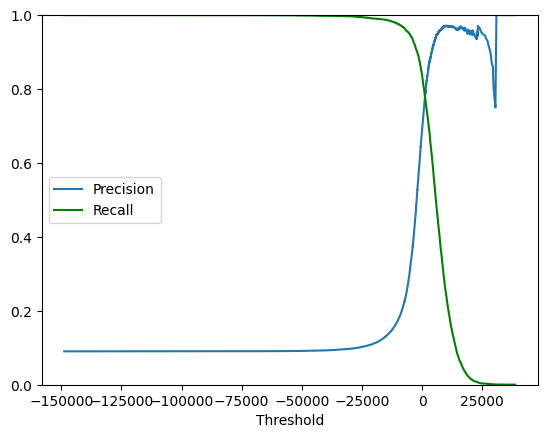

In [48]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [49]:
y_train_pred_90=(y_scores>100)

In [50]:
precision_score(y_train_5,y_train_pred_90)

0.7018527167990036

In [51]:
from sklearn.metrics import roc_curve

In [52]:
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

In [53]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('Percentage false positives')
    plt.ylabel('Percentage true positives')

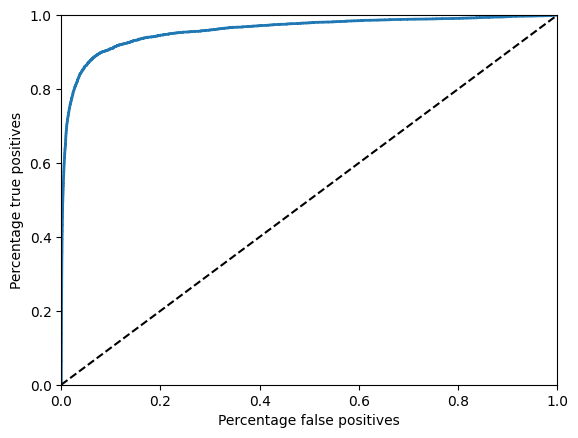

In [54]:
plot_roc_curve(fpr,tpr)
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
roc_auc_score(y_train_5,y_scores)

0.959561174065369

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
forest_clf=RandomForestClassifier(random_state=42)

In [59]:
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

In [60]:
y_scores_forest=y_probas_forest[:,1]

In [61]:
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

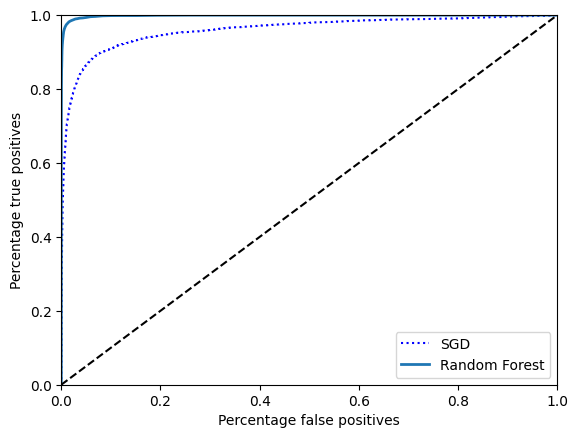

In [62]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [63]:
roc_auc_score(y_train_5,y_scores_forest)

0.998617843354751

In [64]:
precisions, recalls, thresholds=precision_recall_curve(y_train_5,y_scores_forest)

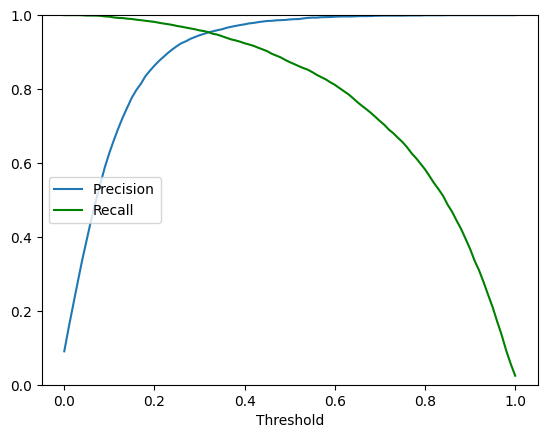

In [65]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [66]:
y_pred_90_forest=(y_scores_forest>0.5)

In [67]:
precision_score(y_train_5,y_pred_90_forest)

0.9890641430073607

In [68]:
recall_score(y_train_5,y_pred_90_forest)

0.8675521121564287

In [69]:
sgd_clf.fit(X_train,y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [70]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [71]:
some_digit_scores=sgd_clf.decision_function([some_digit])

In [72]:
some_digit_scores

array([[-26143.87081381, -31373.17230719, -11203.85995792,
          3966.95113221, -17728.8994482 ,  -4429.97103081,
        -26204.35494021,  -9637.39550685,  -7657.18634184,
         -7367.0453392 ]])

In [73]:
np.argmax(some_digit_scores)

np.int64(3)

In [74]:
sgd_clf.classes_[1]

np.str_('1')

In [75]:
from sklearn.multiclass import OneVsOneClassifier

In [76]:
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))

In [77]:
ovo_clf.fit(X_train,y_train)

,estimator,SGDClassifier(random_state=42)
,n_jobs,None
,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0


In [78]:
ovo_clf.predict([some_digit])

array(['3'], dtype=object)

In [79]:
len(ovo_clf.estimators_)

45

In [80]:
forest_clf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:
forest_clf.predict([some_digit])

array(['3'], dtype=object)

In [82]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.98, 0.  , 0.01, 0.  , 0.  , 0.01, 0.  ]])

In [83]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.8903 , 0.8676 , 0.83555])

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')


c:\Users\grzeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9058 , 0.89835, 0.89575])

#### Confusion analysis

In [85]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)

c:\Users\grzeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [86]:
conf_mx=confusion_matrix(y_train,y_train_pred)

In [87]:
conf_mx

array([[5597,    0,   19,    4,    9,   38,   31,    6,  218,    1],
       [   0, 6418,   44,   21,    3,   42,    4,    8,  192,   10],
       [  22,   24, 5261,   90,   71,   20,   58,   37,  365,   10],
       [  26,   21,  113, 5248,    1,  196,   28,   41,  388,   69],
       [  13,   14,   47,   12, 5206,   13,   32,   19,  325,  161],
       [  27,   19,   30,  164,   48, 4435,   76,   17,  540,   65],
       [  30,   18,   50,    3,   43,   91, 5538,    6,  139,    0],
       [  24,   14,   51,   22,   52,   11,    4, 5696,  178,  213],
       [  14,   58,   38,   87,    2,  120,   33,    8, 5441,   50],
       [  21,   20,   29,   58,  119,   34,    1,  176,  333, 5158]])

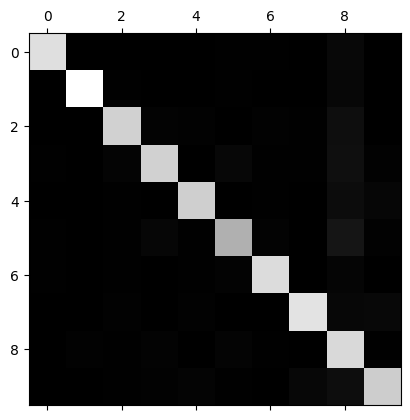

In [88]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [89]:
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx=conf_mx/row_sums

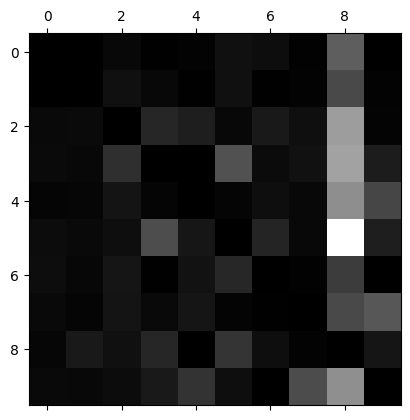

In [90]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [92]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

Multilabel Classification

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
y_train=y_train.astype(int)

In [109]:
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [110]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [111]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average='macro')

0.977026135208904

In [113]:
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

In [116]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[15]])
plot_digit(clean_digit)

NameError: name 'plot_digit' is not defined